In [1]:
# import libraries
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from keras.models import load_model
from PIL import Image
from tqdm import tqdm
import numpy as np
import cv2
import os

In [2]:
# define variables
fish_species = ['Mackerel', 'Seer', 'Sardine', 'Tuna']
IMAGE_SIZE = 224
label_map = {species:i for i,species in enumerate(fish_species)}
reverse_label_map = {i: species for species, i in label_map.items()}


In [3]:
# load model
model_path = r"C:\Users\sowmy\Downloads\Experiments\classification\saved_models\warehouse_dataset\new dataset\m96.h5"
model = load_model(model_path)

##### Test an Image

In [4]:
# show the new image
img_path = r"C:\Users\sowmy\Downloads\Fish Classification\Dataset\train_data\own_data\train_data\new fish dataset\Mackerel_new_own\food3052781606114829325711.jpg"
image = Image.open(img_path)
image.show()

In [5]:
def preprocess_image(img_path):
    # Load and preprocess the new image
    image = cv2.imread(img_path)
    # Resize the image to match the input size of the CNN model
    image = cv2.resize(image, (IMAGE_SIZE, IMAGE_SIZE))  
    # Normalize the image
    image = image / 255.0 

    # Expand dimensions to match the input shape of the CNN model
    image = np.expand_dims(image, axis=0)
    return image

In [6]:
# test the new image
image = preprocess_image(img_path)
prediction = np.argmax(model.predict(image))
prediction = fish_species[prediction]
print(prediction)

1/1 [==============================] - 1s 1s/step
Mackerel


#### Test a folder of images
- The test folder should contain subfolders of images for each species 
##### Test Data folder
- Mackerel 
- Seer
- Sardine
- Tuna

In [7]:
# load the data
test_data_path = r"C:\Users\sowmy\Downloads\Fish Classification\Dataset\train_data\warehouse_data\classification_data\train data"

test_images = []
test_labels = []
for species in fish_species:
    folder_path = os.path.join(test_data_path, species)
    if os.path.isdir(folder_path):
        for filename in tqdm(os.listdir(folder_path), desc=f"Loading {species}"):
                if filename.endswith((".jpg",".jpeg", ".webp", ".png", ".JPEG")):
                    image_path = os.path.join(folder_path, filename)
                    image = cv2.imread(image_path)
                    image = cv2.resize(image, (IMAGE_SIZE, IMAGE_SIZE))
                    test_images.append(image)
                    test_labels.append(label_map[species])
                    
test_images = np.array(test_images)
test_images = test_images/255.0
test_labels = np.array(test_labels)

Loading Tuna: 100%|██████████| 34/34 [00:05<00:00,  6.49it/s]


In [8]:
test_images.shape

(616, 224, 224, 3)

20/20 [==============================] - 11s 551ms/step


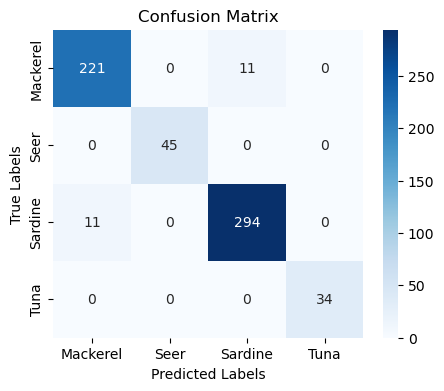

              precision    recall  f1-score   support

    Mackerel       0.95      0.95      0.95       232
     Sardine       0.96      0.96      0.96       305
        Seer       1.00      1.00      1.00        45
        Tuna       1.00      1.00      1.00        34

    accuracy                           0.96       616
   macro avg       0.98      0.98      0.98       616
weighted avg       0.96      0.96      0.96       616



In [9]:
# test images
predictions = model.predict(test_images)
predictions = [np.argmax(pred) for pred in predictions]


# Generate confusion matrix
cm = confusion_matrix(test_labels, predictions)

# Plot the confusion matrix
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=fish_species, yticklabels=fish_species)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

test_species = [reverse_label_map[label] for label in test_labels]
predicted_species = [reverse_label_map[label] for label in predictions]


# Calculate classification metrics 
report = classification_report(test_species, predicted_species, zero_division=1)
print(report)